## Metagenomics runs description

Exploratory data analysis of module combinations for metagenomics viral detection. 

### Data set info, and tranformation for query.

the dictionary `pri_val` corresponds to the information provided in the original benchmarking article on the data sets published.

the dictionary `validation` corresponds to the same information, but the first entry of each tuple is changed to allow for pattern matching queries int the data base we are using. 

In [1]:
from modules.validator import Validator
from modules.eda_class_native import run_eda, standardize_runs_df, df_runid_summary #, Validator
from modules.constants_settings import ConstantsSettings as CS
import pandas as pd
from modules.data_import import infer_source_files_technology, read_references_filter

In [2]:

METADATA_DIR = "benchmark_metadata/"
INTERMEDIATE_OUTPUT_DIR= "analysis_data/"
OUTPUT_DIR = "output/"
INPUT_DIR = "benchmark_data/"


## Inputing Data

In [4]:


technology= CS.TECHNOLOGY_minion # options minion, illumina
### input data

all_reports_file, all_parameters_file, all_references_file, validation_file= infer_source_files_technology(technology, INPUT_DIR, METADATA_DIR)
raw_refs= read_references_filter(all_references_file, benchmark_prefix="benchmark_batch")

## validation data
validator = Validator(validation_file, raw_refs)

### summary data
eda_runs = run_eda(validator, all_reports_file, all_parameters_file, INTERMEDIATE_OUTPUT_DIR)



### Processing data

In [4]:
eda_runs.split()
eda_runs.combine_data()

full_data = eda_runs.combdat
dataset_success = eda_runs.get_combd_data_success()
sources = eda_runs.sources

combdat_full_process = standardize_runs_df(eda_runs.combdat) ##
run_assess = df_runid_summary(combdat_full_process)



/home/bioinf/Desktop/CODE/CODE/RUN_EDA/benchmark/benchmark_ont/eda_class_native.py:592: DtypeWarning: Columns (46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  combdat = pd.read_csv("combined_reports.tsv", sep="\t")


['32_43' '32_42' '32_41' '32_40' '37_54' '37_53' '37_50' '37_51' '37_49'
 '42_62' '42_61' '42_60' '42_57' '48_74' '48_69' '48_67' '48_66' '48_65'
 '49_73' '49_72' '49_71' '49_70']


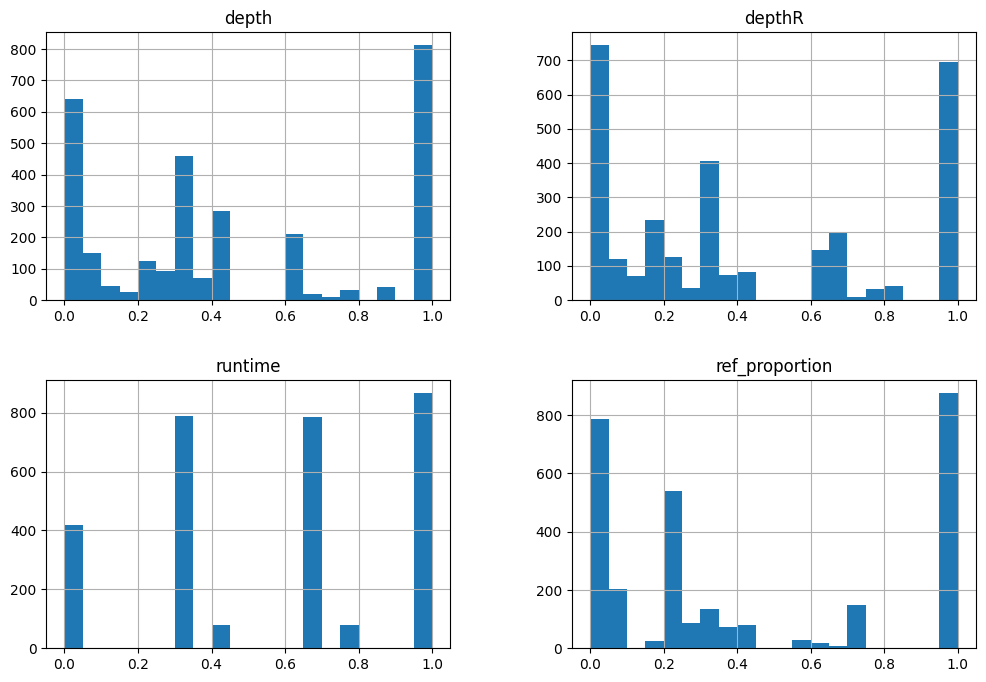

In [35]:

fig= run_assess[["depth", "depthR", "runtime", "ref_proportion"]].hist(figsize=(12,8), bins=20)


## Pipeline tree

Extract Data and Parse for trees

In [5]:
#####
### generate tree
from modules.benchmark_graph_utils import pipeline_tree, tree_plot

pipe_tree = pipeline_tree(INTERMEDIATE_OUTPUT_DIR)
pipe_tree.param_input(technology)
pipe_tree.create_pipe_tree()

inter_scores= pipe_tree.calculate_node_scores_with_source_subset_draw(
    eda_runs.softs, run_assess, cv= 100, subset=.7)


In [6]:

import os
import pandas as pd





calculating node scores with source subset draw
calculating node scores
(1386, 13)
calculating node scores
(1398, 13)
calculating node scores
(1155, 13)
calculating node scores
(1158, 13)
calculating node scores
(1404, 13)
calculating node scores
(1278, 13)
calculating node scores
(1395, 13)
calculating node scores
(1620, 13)
calculating node scores
(1278, 13)
calculating node scores
(1854, 13)
calculating node scores
(1383, 13)
calculating node scores
(1380, 13)
calculating node scores
(1629, 13)
calculating node scores
(1167, 13)
calculating node scores
(1266, 13)
calculating node scores
(1728, 13)
calculating node scores
(1278, 13)
calculating node scores
(1170, 13)
calculating node scores
(1971, 13)
calculating node scores
(1629, 13)
calculating node scores
(1617, 13)
calculating node scores
(1512, 13)
calculating node scores
(1518, 13)
calculating node scores
(1512, 13)
calculating node scores
(1515, 13)
calculating node scores
(1386, 13)
calculating node scores
(1506, 13)
calcula

### Preliminary Analysis. PCA

In [7]:

import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
### extract pipeline statistics (tree leaves).
pipe_tree_df= pipe_tree.node_weights.copy()
#####
pipe_tree_df_leaves= pipe_tree_df.iloc[pipe_tree.leaves]
pipe_tree_df_leaves= pipe_tree_df_leaves.drop(columns= ["finished"])

X= np.array(pipe_tree_df_leaves)
pca = PCA(n_components=4).fit(X)
pipe_tree_df_pca= pd.DataFrame(pca.transform(X), columns= ["pc1", "pc2", "pc3", "pc4"],
                               index= pipe_tree_df_leaves.index)    

pipe_tree_df_pca= pd.concat([pipe_tree_df_leaves, pipe_tree_df_pca], axis=1)


#### Summary Statistics overview

Variance


In [11]:
pca.explained_variance_ratio_


array([0.57700459, 0.19135011, 0.14633662, 0.05420278])

Loadings

In [12]:
pd.DataFrame(pca.components_.T, columns=['pca1','pca2', 'pca3', 'pca4'],index=pipe_tree_df_pca.columns[:-4])

,pca1,pca2,pca3,pca4
coverage,-0.222637,0.629020,-0.224064,0.441841
depth,-0.077867,0.254012,-0.083507,0.059825
depthR,-0.069930,0.230750,-0.085435,0.026663
complete,-0.067270,0.046310,-0.357760,-0.187889
ahelp,-0.131991,0.240409,-0.402532,-0.788154
rhelp,0.106454,-0.536515,-0.727712,0.280016
runtime,-0.945278,-0.308201,0.102917,0.013929
precision,-0.095599,0.167947,-0.310552,0.196837
ref_proportion,-0.056671,0.122415,-0.084176,0.160789
branch_coverage,-0.017278,0.024441,-0.042584,0.028227


Visualization

In [8]:


pipe_tree_df_pca["node"]= pipe_tree_df_pca.index
fig = px.scatter(pipe_tree_df_pca, x="pc2", y="pc1", color="node", hover_data=["node"])
fig.update_traces(textposition="bottom right")



fig.update_layout(
    autosize=False,
    width=1200,
    height=750,)


fig.update_traces(
    marker=dict(
        size=12,
    ),
)
fig.show()

fig = px.scatter(pipe_tree_df_pca, x="pc2", y="pc4", color="node", hover_data=["node"])
fig.update_traces(textposition="bottom right")


fig.update_layout(
    autosize=False,
    width=1200,
    height=750,)


fig.update_traces(
    marker=dict(
        size=12,
    ),
)

fig.show()

## Manipulation

In [9]:
pipe_tree_df_leaves.sort_values("coverage", ascending=False).head(15)


,coverage,depth,depthR,complete,ahelp,rhelp,runtime,precision,ref_proportion,branch_coverage
node,,,,,,,,,,
287,0.935948,0.521962,0.462772,0.129075,0.246653,0.918838,0.338631,0.329699,0.439848,1.0
838,0.935948,0.521962,0.462772,0.032988,0.097524,0.935464,0.680278,0.333064,0.439848,1.0
704,0.935948,0.521962,0.462772,0.129075,0.246653,0.918838,0.679992,0.329699,0.439848,1.0
421,0.935948,0.521962,0.462772,0.032988,0.097524,0.935464,0.338872,0.333064,0.439848,1.0
1255,0.935945,0.521515,0.462345,0.059245,0.131237,0.928008,0.996984,0.334619,0.439176,1.0
1121,0.935945,0.521515,0.462345,0.159712,0.276976,0.920223,0.996689,0.333190,0.439176,1.0
566,0.933461,0.513690,0.454659,0.099998,0.308219,0.833338,0.679711,0.309300,0.431255,1.0
149,0.933461,0.513690,0.454659,0.099998,0.308219,0.833338,0.338376,0.309300,0.431255,1.0
983,0.933458,0.513243,0.454233,0.123703,0.340599,0.828722,0.996384,0.311014,0.430583,1.0


<Axes: >

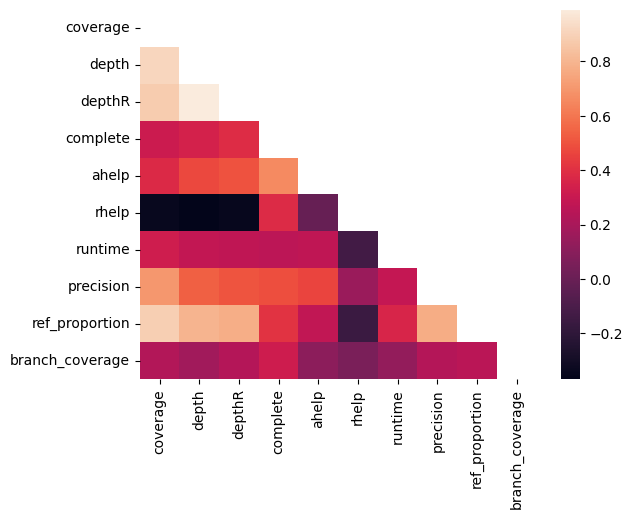

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
# plor palette: https://seaborn.pydata.org/tutorial/color_palettes.html
# calculate the correlation matrix
corr = pipe_tree_df_leaves.corr()
# plot the heatmap
matrix = np.triu(corr)
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        mask=matrix,)

<Axes: xlabel='coverage', ylabel='precision'>

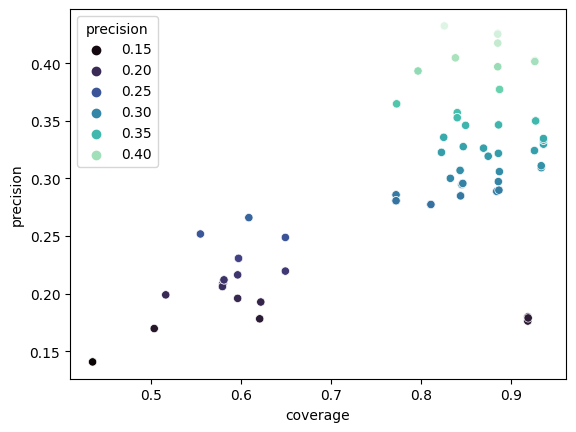

In [11]:
sns.scatterplot(data=pipe_tree_df_leaves, x= "coverage", y= "precision", hue= "precision",
                palette= "mako", legend= True)


pipe_tree_df_leaves.head()

In [12]:

pipe_tree_df_leaves.head()

,coverage,depth,depthR,complete,ahelp,rhelp,runtime,precision,ref_proportion,branch_coverage
node,,,,,,,,,,
34,0.927238,0.508239,0.449425,0.143596,0.379945,0.845236,0.338649,0.349881,0.426194,1.0
43,0.927238,0.508239,0.449425,0.143596,0.379945,0.845236,0.338901,0.349881,0.426194,1.0
52,0.927238,0.508239,0.449425,0.143596,0.379945,0.845236,0.339156,0.349881,0.426194,1.0
64,0.810831,0.451532,0.403505,0.095206,0.302690,0.886903,0.306335,0.277372,0.382027,1.0
72,0.883988,0.482330,0.422206,0.025531,0.268497,0.757034,0.323066,0.288759,0.381475,1.0


## Tree View

      coverage     depth    depthR  complete     ahelp     rhelp   runtime  \
node                                                                         
362   0.579761  0.357869  0.303989  0.029763  0.099036  0.991913  0.218581   
344   0.579761  0.357869  0.303989  0.029763  0.099036  0.991913  0.218142   
779   0.579761  0.357869  0.303989  0.029763  0.099036  0.991913  0.436506   
761   0.579761  0.357869  0.303989  0.029763  0.099036  0.991913  0.436084   
1196  0.580808  0.357443  0.303243  0.049324  0.144027  0.988450  0.636625   
1178  0.580808  0.357443  0.303243  0.049324  0.144027  0.988450  0.636220   
391   0.579117  0.374441  0.311384  0.025663  0.117927  0.983144  0.217608   
808   0.579117  0.374441  0.311384  0.025663  0.117927  0.983144  0.433082   
619   0.772082  0.424098  0.377908  0.131685  0.234193  0.979083  0.585808   
202   0.772082  0.424098  0.377908  0.131685  0.234193  0.979083  0.292435   

      precision  ref_proportion  branch_coverage  stat_combined

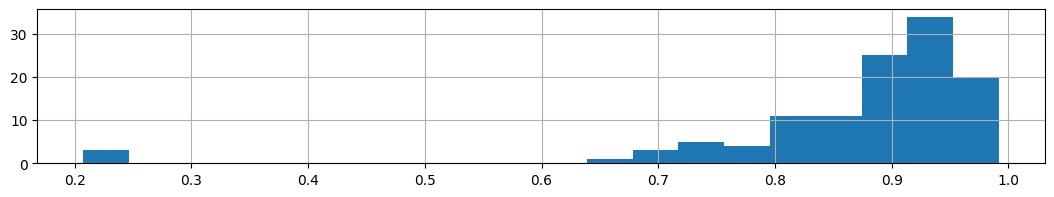

compressing tree


In [13]:

import matplotlib.pyplot as plt
internode_function= np.median

stats= ["precision", "ref_proportion", "coverage", "complete"]
#
stats = ["ref_proportion","precision", "depth", "ahelp"]


###
subset_stats= pipe_tree_df_leaves[stats]
view_stats= pipe_tree_df_leaves.copy()
view_stats["stat_combined"]= subset_stats.prod(axis= 1)
view_stats= view_stats.sort_values("stat_combined", ascending=False)


######## plot stat distribution

fig= view_stats["stat_combined"].hist(figsize=(13,2), bins=20)
plt.show(fig)

######### 

pipe_tree.tree_scores(stats,internode_function= internode_function) 
print("compressing tree")
pipe_tree.compress_tree()

nodes = pipe_tree.nodes_compress
edges = pipe_tree.edge_compress
weights = pipe_tree.weights


### tree plot
pipe_graph = tree_plot()
prox= pipe_tree.node_index.to_dict()["node"]
prox= {k: [k,v] for k,v in prox.items()}
pipe_graph.graph(nodes, prox, edges, weights)
pipe_graph.generate_graph()
graph_fig = pipe_graph.graph_plot()


graph_fig.update_layout(
    autosize=False,
    width=1050,
    height=600,)

graph_fig




In [26]:
eda_runs.data_total.classification_success.value_counts()

none                 23721
reads                10706
contigs               8277
reads and contigs     2428
Name: classification_success, dtype: int64

In [13]:
pipe_tree_df_pca.head()

,coverage,depth,depthR,complete,ahelp,finished,precision,ref_proportion,branch_coverage,pc1,pc2,pc3,pc4,node
node,,,,,,,,,,,,,,
34,0.942640,0.518844,0.465718,0.023461,0.395512,1.000000,0.318532,0.438663,1.0,-0.220993,-0.062887,0.030060,-0.001578,34
43,0.942640,0.518844,0.465718,0.023461,0.395512,1.000000,0.318532,0.438663,1.0,-0.220993,-0.062887,0.030060,-0.001578,43
52,0.942640,0.518844,0.465718,0.023461,0.395512,1.000000,0.318532,0.438663,1.0,-0.220993,-0.062887,0.030060,-0.001578,52
64,0.820105,0.464413,0.420592,0.018618,0.312036,0.869237,0.240372,0.397649,1.0,0.004557,-0.040708,0.044288,-0.014364,64
72,0.945335,0.521157,0.467738,0.009831,0.277498,1.000000,0.253281,0.440555,1.0,-0.170722,0.061655,0.044950,-0.010667,72


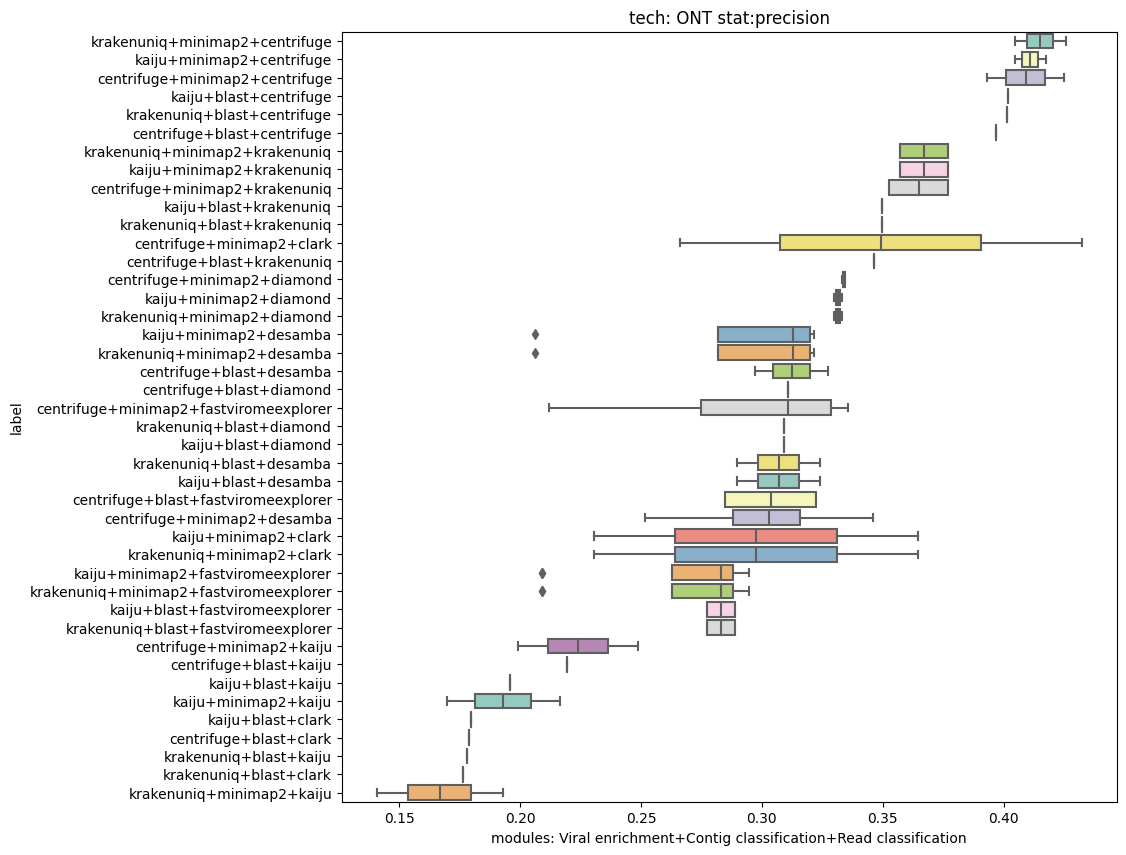

In [14]:
### boxplot analysis.

stats= ["precision", "ahelp", "coverage"]
stats= ["coverage" , "ref_proportion", "depth"]
stats= ["coverage", "precision"]
stats= ["rhelp", "precision"]
stats= ["precision", ]

##### selecting nodes by software
leaf_paths= pipe_tree.get_leaf_paths()
leaf_paths_index= {
    l: pipe_tree.node_index.loc[g] for l,g in leaf_paths.items()
}


stats_df= pipe_tree_df_pca.copy()


select_modules_dict= {
    #CS.PIPELINE_NAME_contig_classification: ["blast", "minimap2"],
    CS.PIPELINE_NAME_viral_enrichment: ["kaiju", "centrifuge", "krakenuniq"],
}

#select_modules_dict= {
#    CS.PIPELINE_NAME_contig_classification: ["blast", "minimap2"],
#}

select_modules_dict= {
    CS.PIPELINE_NAME_viral_enrichment: ["kaiju", "centrifuge", "krakenuniq"],
    CS.PIPELINE_NAME_contig_classification: ["blast", "minimap2"],
    CS.PIPELINE_NAME_read_classification: ["kaiju", "centrifuge", "krakenuniq", "diamond", "desamba", "clark", "fastviromeexplorer"],
}

def check_node_selected(row, select_modules_dict):
    all_found= 0
    node= row.name
    node_df= leaf_paths_index.get(node)
    final_name= []
    for m, soft_list in select_modules_dict.items():
        for s in soft_list:
            node= (m, s, "module")
            if node in list(node_df.node.values):
                final_name.append(s)
    
    if len(final_name):
        return "+".join(final_name)
    else:
        return None            


stats_df["label"]= stats_df.apply(lambda x: check_node_selected(x, select_modules_dict), axis=1)
stats_df= stats_df[stats_df["label"].notnull()]

#### plot boxplot
stats_df["stat_combined"]= stats_df[stats].prod(axis= 1)

plot_df_group_stats= stats_df[["stat_combined", "label"]].copy()
plot_df_group_stats= plot_df_group_stats.groupby("label").median().sort_values("stat_combined", ascending=False)
stats_df["median"]= stats_df["label"].map(plot_df_group_stats["stat_combined"].to_dict())
stats_df= stats_df.sort_values("median", ascending=False)

fig = px.box(stats_df, y="label", x="stat_combined", points="all", 
                color="label",    
                title = " * ".join(stats),            
             )

# y axis label


fig.update_layout(
    autosize=False,
    width=1200,
    height=750,)
fig.show()


### sns plot

fig = plt.figure(figsize=(10, 10))

fig= sns.boxplot(data=stats_df, y="label", x="stat_combined", palette="Set3")
fig.set_title(f"tech: {technology} stat:" + " * ".join(stats))

# x label 
xlbal= '+'.join(select_modules_dict.keys())
                
fig.set_xlabel(f"modules: {xlbal}")

plt.show(fig)




In [25]:
node_runs_df.node.value_counts().head(10)

34     22
808    22
945    22
934    22
924    22
916    22
906    22
898    22
886    22
877    22
Name: node, dtype: int64

In [15]:

##### selecting nodes by software
leaf_paths= pipe_tree.get_leaf_paths()
leaf_paths_index= {
    l: pipe_tree.node_index.loc[g] for l,g in leaf_paths.items()
}

select_modules_dict= {
    CS.PIPELINE_NAME_assembly: ["raven"],
    CS.PIPELINE_NAME_contig_classification: ["minimap2"],
    CS.PIPELINE_NAME_read_classification: ["fastviromeexplorer", "kaiju"],
}


def check_node_selected(node_df, select_modules_dict):
    all_found= 0
    for m, soft_list in select_modules_dict.items():
        for s in soft_list:
            node= (m, s, "module")
            if node in list(node_df.node.values):

                all_found += 1
                break
    if all_found == len(select_modules_dict):
        return True
    return False

leaf_paths_index_select= {k: v for k,v in leaf_paths_index.items() if check_node_selected(v, select_modules_dict)}
leaf_paths_index_select.keys()

dict_keys([202, 210, 220, 228, 267, 336, 344, 354, 362, 401, 619, 627, 637, 645, 684, 753, 761, 771, 779, 818, 1036, 1044, 1054, 1062, 1101, 1170, 1178, 1188, 1196, 1235])

## Pipeline Analysis

In [16]:
import pandas as pd
import numpy as np

class Validator:

    validation: pd.DataFrame

    def __init__(self, filepath):

        self.validation_set = self.load_validation(filepath)

    @staticmethod
    def check_content(df):
        checksum = 0
        if "taxid" not in df.columns:
            df["taxid"] = np.nan
            checksum += 1

        if "accid" not in df.columns:
            df["accid"] = np.nan
            checksum += 1

        if "description" not in df.columns:
            df["description"] = np.nan
            checksum += 1

        if checksum == 3:
            print(
                "all columns absent. provide at least one validator: taxid, accid or description."
            )

        return df

    def load_validation(self, file_path):

        df = pd.read_csv(file_path, sep="\t")

        df = self.check_content(df)

        df = df.dropna()
        df["taxid"] = df.taxid.apply(lambda x: [y for y in x.split(";")])
        df["accid"] = df.accid.apply(lambda x: [y for y in x.split(";")])

        df.set_index("sample_name", inplace=True)

        return df

    def assess(self, x):

        if x.taxid in self.validation_set.loc[sample_name].taxid:
            return True
        if x.accid in self.validation_set.loc[sample_name].accid:
            return True

        for subdesc in self.validation_set.loc[sample_name].description.split(";"):
            if subdesc.lower() in x.description.lower():
                return True

        return False

    def assess_ignorant(self, x):

        samples= []

        for sample_name in self.validation_set.index:
            added= 0
            if x.taxid in self.validation_set.loc[sample_name].taxid:
                samples.append(sample_name)
                added += 1
                
            if x.accid in self.validation_set.loc[sample_name].accid:
                if added == 0:
                    samples.append(sample_name) 
                    added += 1

            
            for subdesc in self.validation_set.loc[sample_name].description.split(";"):
                if added > 0:
                    break
                if subdesc.lower() in x.description.lower():
                    samples.append(sample_name)
                    added += 1

        if len(samples):
            return ";".join(samples)
            
        return "None"

    def assess_assembly_classification(self, x):

        if "contigs" in x.classification_success:
            return True

        return False

    def assess_read_classification(self, x):

        if "reads" in x.classification_success:
            return True

        return False

    def assess_complete(self, x):

        if x.rhelp == True and x.ahelp == True:
            return True

        return False


In [17]:
validator = Validator("benchmark_ont_validation.tsv")
raw_refs= pd.read_csv("all_references_ont.tsv", sep="\t")

raw_refs= raw_refs[raw_refs.project.str.contains("benchmark_batch")]

raw_ref_unique= raw_refs.drop_duplicates(subset=["accid"])[["taxid","accid", "description"]]
raw_ref_unique["samples_found"]= raw_ref_unique.apply(validator.assess_ignorant, axis=1)

raw_refs= pd.merge(raw_refs, raw_ref_unique[["accid", "samples_found"]], on="accid", how="left")
raw_refs["found"]= raw_refs.apply(
    lambda x: True if x.sample_name in x.samples_found.split(";") else False, axis=1
)
raw_refs.head()

,id,run_id,status,taxid,accid,description,counts,classification_source,run,sample,sample_id,sample_name,project,project_id,samples_found,found
0,9595.0,1069,0.0,35244,NC_005261.3,Bovine alphaherpesvirus 5 strain=SV507/99,16,1,run_leaf_1007,BHV1-reads,43,BHV1-reads,benchmark_batch01,32,BHV1-reads;WTA2-PI3,True
1,9596.0,1069,0.0,202910,NC_043054.1,Bubaline alphaherpesvirus 1 strain=b6,16 / 16,3,run_leaf_1007,BHV1-reads,43,BHV1-reads,benchmark_batch01,32,WTA2-PI3,False
2,9597.0,1069,0.0,159150,NC_018467.1,Shamonda orthobunyavirus,6,1,run_leaf_1007,BHV1-reads,43,BHV1-reads,benchmark_batch01,32,WTA2-PI3,False
3,9598.0,1069,0.0,133704,NC_001792.2,Porcine circovirus 1,4,1,run_leaf_1007,BHV1-reads,43,BHV1-reads,benchmark_batch01,32,WTA2-PI3,False
4,9599.0,1069,0.0,10345,NC_006151.1,Suid alphaherpesvirus 1 strain=Composite of 6 ...,4,1,run_leaf_1007,BHV1-reads,43,BHV1-reads,benchmark_batch01,32,WTA2-PI3,False


In [22]:
### gather_runid_f1
import warnings
warnings.filterwarnings("ignore")

def filter_raw_ref(raw_refs, node_stats: list= []):
    raw_refs_analyse= raw_refs.copy()

    if len(node_stats):
        runs= node_runs_df[node_runs_df.node.isin(node_stats)]
        runs= [x for x in runs.runids.unique()]
        runs= [x.split("_")[-1] for x in runs]
        runs= [int(x) for x in runs]

        raw_refs_analyse= raw_refs_analyse[raw_refs_analyse.run_id.isin(runs)]

    return raw_refs_analyse


def sort_by_counts_simple(df):
    
    counts= df.counts.values
    for ix, ct in enumerate(counts):
        if "/" in ct:
            counts[ix]= int(ct.split("/")[0])
    
    df["simple_counts"]= [float(x) for x in counts]
    df= df.sort_values("simple_counts", ascending=False)
    df.drop("simple_counts", axis=1, inplace=True)
    return df

def sort_by_counts_combined(df):
    df= df.sort_values("id", ascending= False)
    return df


def remap_threshold_stats(runid_df: pd.DataFrame, max_remap: int= 20, sort_type: str= "simple_counts"):

    f1_df= []
    precision_df= []
    recall_df= []

    for rid in raw_refs_analyse.run_id.unique():
        ridf= raw_refs_analyse[raw_refs_analyse.run_id == rid]

        if sort_type == "simple_counts":
            ridf= sort_by_counts_simple(ridf)
        elif sort_type == "combined":
            ridf= sort_by_counts_combined(ridf)


        f1_list= [rid]
        precision_list= [rid]
        recall_list= [rid]
        all_found= ridf.found.sum()

        for rmap in range(0, max_remap):
            rmap_sel= ridf.head(rmap)
            true_positives= rmap_sel.found.sum()
            false_positives= rmap_sel.shape[0] - true_positives
            false_negatives= all_found - true_positives

            #print(false_negatives)

            f1= true_positives / (true_positives * 0.5 * (false_positives + false_negatives))
            precision= true_positives / (true_positives + false_positives)
            recall= true_positives / (true_positives + false_negatives)
            
            f1_list.append(f1)
            precision_list.append(precision)
            recall_list.append(recall)

        f1_df.append(f1_list)
        precision_df.append(precision_list)
        recall_df.append(recall_list)

    f1_df= pd.DataFrame(f1_df, columns= ["run_id"] + [f"rem_{r}" for r in range(0,max_remap)])
    precision_df= pd.DataFrame(precision_df, columns= ["run_id"] + [f"rem_{r}" for r in range(0,max_remap)])
    recall_df= pd.DataFrame(recall_df, columns= ["run_id"] + [f"rem_{r}" for r in range(0,max_remap)])

    return f1_df, precision_df, recall_df


sort_type= "combined" # options: simple_counts, combined
node_stats= []
#node_stats= nodes_selected_stat[:10]
#node_stats= list(leaf_paths_index_select)
max_remap= 20
raw_refs_analyse= filter_raw_ref(raw_refs, node_stats)
f1_df, precision_df, recall_df= remap_threshold_stats(raw_refs_analyse, max_remap = max_remap, sort_type= sort_type)


In [23]:
def clean_df_standardize(df: pd.DataFrame):
    df_new= df.copy()
    df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
    intermediate= df_new.iloc[:,1:].T / df_new.iloc[:,1:].max(axis=1, skipna=True)
    df_new.iloc[:,1:]= intermediate.T

    return df_new


In [ ]:

f1_df_play= f1_df.copy()
f1_df_play.replace([np.inf, -np.inf], np.nan, inplace=True)
intermediate= f1_df_play.iloc[:,1:].T / f1_df_play.iloc[:,1:].max(axis=1, skipna=True)
f1_df_play.iloc[:,1:]= intermediate.T

precision_df_play= precision_df.copy()
precision_df_play.replace([np.inf, -np.inf], np.nan, inplace=True)
intermediate= precision_df_play.iloc[:,1:].T / precision_df_play.iloc[:,1:].max(axis=1, skipna=True)
precision_df_play.iloc[:,1:]= intermediate.T

recall_df_play= recall_df.copy()
recall_df_play.replace([np.inf, -np.inf], np.nan, inplace=True)
intermediate= recall_df_play.iloc[:,1:].T / recall_df_play.iloc[:,1:].max(axis=1, skipna=True)
recall_df_play.iloc[:,1:]= intermediate.T


In [7]:
precision_df_play.shape

(3135, 21)

<Figure size 1000x500 with 0 Axes>

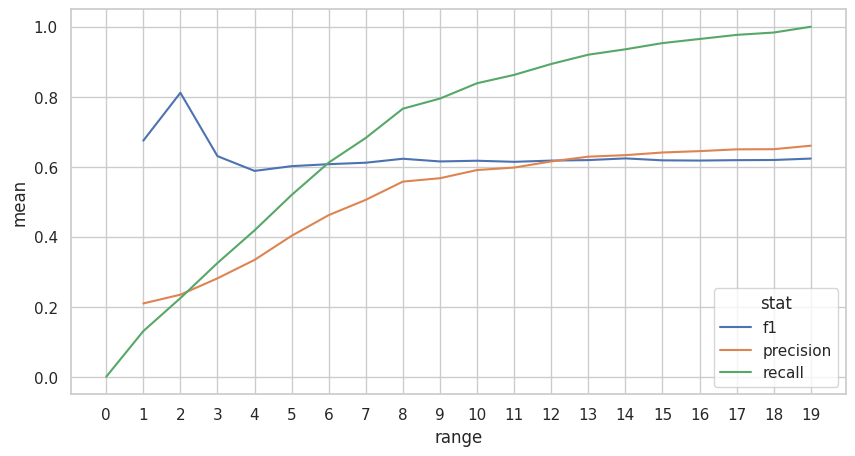

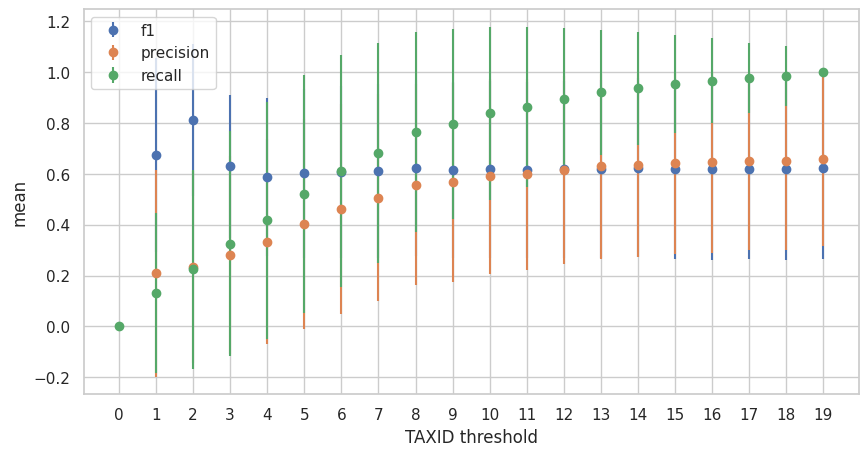

In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt 

means_f1= f1_df_play.iloc[:,1:].mean(axis=0, skipna=True)
std_f1= f1_df_play.iloc[:,1:].std(axis=0, skipna=True)
f1_stats= pd.DataFrame(
    {
        "range": [r for r in range(0,max_remap)],
        "mean": means_f1,
        "std": std_f1,
        "stat": "f1"
    }
)

means_precision= precision_df_play.iloc[:,1:].mean(axis=0, skipna=True)
std_precision= precision_df_play.iloc[:,1:].std(axis=0, skipna=True)
precision_stats= pd.DataFrame(
    {
        "range": [r for r in range(0,max_remap)],
        "mean": means_precision,
        "std": std_precision,
        "stat": "precision"
    }
)


means_recall= recall_df_play.iloc[:,1:].mean(axis=0, skipna=True)   
std_recall= recall_df_play.iloc[:,1:].std(axis=0, skipna=True)
recall_stats= pd.DataFrame(
    {
        "range": [r for r in range(0,max_remap)],
        "mean": means_recall,
        "std": std_recall,
        "stat": "recall"
    }
)

compound_stats= pd.concat([f1_stats, precision_stats, recall_stats], axis=0).reset_index(drop=True)
compound_horizontal= pd.DataFrame(
    {   
        "precision": means_precision,
        "recall": means_recall,
    }

)

## plotly lineplot

import plotly.express as px

plt.figure(figsize=(10,5))
fig = px.line(compound_stats, x="range", y="mean", color='stat')

# plotly image size

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4

    ),
    paper_bgcolor="LightSteelBlue",
)

# Plotly xticks

fig.update_xaxes(
    tickmode = 'array',
    tickvals = tuple(range(0, max_remap)),
)

fig.show()

## seaborn plot with std

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))

sns.lineplot(
    data=compound_stats,
    x="range",
    y="mean",
    hue= "stat"

)

plt.xticks(range(0, max_remap))

plt.show()


plt.figure(figsize=(10,5))
plt.errorbar(range(0, max_remap), means_f1, yerr=std_f1, fmt='o')
plt.errorbar(range(0, max_remap), means_precision, yerr=std_precision, fmt='o')
plt.errorbar(range(0, max_remap), means_recall, yerr=std_recall, fmt='o')
plt.xticks(range(0, max_remap))
plt.xlabel("TAXID threshold")
plt.ylabel("mean")
plt.legend(["f1", "precision", "recall"])
plt.show()




In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,6))

sns.scatterplot(
    data=compound_horizontal,
    x="precision",
    y="recall",

)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

NameError: name 'compound_horizontal' is not defined

<Figure size 600x600 with 0 Axes>